<div class="alert alert-block alert-info">
<font size=5 style="bold"> Assignment 2: Missing data with Stata</font>

<b>Stataistical Computing with R & Stata </b><br><br>MSc. EBHC Medical Statistics (2022-2024), 
Nataraj Dasgupta

In [2]:
import os
os.chdir('/Applications/Stata/utilities')
from pystata import config
config.init('be')
import pandas as pd
config.set_graph_size(width=6)
base_folder="/Users/xbsd/oxford/semesters/semester_2/stata_and_r/"


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user perpetual
Serial number: 301706416437
  Licensed to: Nataraj Dasgupta
               Univ. of Oxford

Notes:
      1. Unicode is supported; see help unicode_advice.


In [3]:
%%stata
cd "/Users/xbsd/oxford/semesters/semester_2/stata_and_r/OXF_STR_Week2"

/Users/xbsd/oxford/semesters/semester_2/stata_and_r/OXF_STR_Week2


<font size=5>Note on questions:</font>

I had some questions pertaining to this exercise. I have indicated them in <font color="red">**bold red**</font> to make it easy to locate them. Thanks in advance for any assistance with the questions!

# <font color="teal">Question 1 </font>

Now you are going to apply everything you have been taught regarding missing data to a different data set. In this new data set we want to examine the association between diabetes and different risk factors. As you might expect, there is missing data and you are going to explore and analyse. Download the `nhanes_MM_exercise.dta` dataset and investigate the missingness. Then choose one or more of the following methods:

    full case analysis
    single imputation methods
    multiple imputation

Report your findings including relevant output from Stata.

In [4]:
%%stata -doutd nhanes
use "nhanes_MM_exercise", clear

In [5]:
nhanes.head()

,seqn,gender,age,Ethnicity,Income,BMI,waist_cir,diabetes,LDL_chol,hypertension
0,73557,1,69,4,4.0,26.700001,1.000000e+02,1,8.988466e+307,0.0
1,73558,1,54,3,7.0,28.600000,1.076000e+02,1,8.988466e+307,1.0
2,73559,1,72,3,10.0,28.900000,1.092000e+02,1,0.000000e+00,1.0
3,73561,2,73,3,15.0,19.700001,8.988466e+307,0,2.000000e+00,0.0
4,73562,1,56,1,9.0,41.700001,1.231000e+02,0,8.988466e+307,1.0


**Tabulation of Missing Data**

We first tabulate the missing data using `misstable` in Stata. The results indicate that `LDL_chol` has the highest number of missing records (3,446) which is more than 56% of the dataset (6,110) records. The frequency estimate shows that only 2,261 records have no missing values.

                  |   Pattern
        Frequency |  1  2  3  4    5
      ------------+------------------
            2,261 |  1  1  1  1    1
            
    Variables are  (1) BMI  (2) Income  (3) waist_cir  (4) hypertension (5) LDL_chol

An analysis of nesting showed no evidence of missingness between combinations of variables

In [6]:
%%stata

//Describe data
describe

//Summarise misstable
misstable summarize

//Nested analysis
misstable nested


. 
. //Describe data
. describe

Contains data from nhanes_MM_exercise.dta
 Observations:         6,110                  
    Variables:            10                  19 Oct 2017 11:38
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
seqn            long    %12.0g                
gender          byte    %8.0g                 
age             byte    %8.0g                 
Ethnicity       byte    %8.0g                 
Income          byte    %8.0g                 
BMI             float   %9.0g                 
waist_cir       float   %9.0g                 
diabetes        byte    %8.0g                 
LDL_chol        float   %9.0g      chol       
hypertension    float   %9.0g                 
-------------------------------------------------------------------------------
S

In [7]:
%%stata

//Frequency
misstable patterns, frequency


. 
. //Frequency
. misstable patterns, frequency

      Missing-value patterns
        (1 means complete)

              |   Pattern
    Frequency |  1  2  3  4    5
  ------------+------------------
        2,261 |  1  1  1  1    1
              |
        2,662 |  1  1  1  1    0
          229 |  1  1  1  0    0
          184 |  0  1  0  0    0
          170 |  1  1  1  0    1
          129 |  1  0  1  1    0
          128 |  1  1  0  1    0
           97 |  1  0  1  1    1
           70 |  1  1  0  1    1
           34 |  1  1  0  0    0
           24 |  0  1  0  1    0
           24 |  1  1  0  0    1
           19 |  0  0  0  0    0
           17 |  0  1  0  1    1
           13 |  1  0  1  0    0
           11 |  1  0  0  1    0
            9 |  1  0  1  0    1
            7 |  0  1  1  1    0
            6 |  0  1  1  1    1
            6 |  1  0  0  1    1
            4 |  0  0  0  1    0
            2 |  0  0  0  0    1
            2 |  0  1  0  0    1
            1 |  0  0  1

In [8]:
%%stata

//In percentage terms
misstable patterns


. 
. //In percentage terms
. misstable patterns

      Missing-value patterns
        (1 means complete)

              |   Pattern
    Percent   |  1  2  3  4    5
  ------------+------------------
       37%    |  1  1  1  1    1
              |
       44     |  1  1  1  1    0
        4     |  1  1  1  0    0
        3     |  0  1  0  0    0
        3     |  1  1  1  0    1
        2     |  1  0  1  1    0
        2     |  1  1  0  1    0
        2     |  1  0  1  1    1
        1     |  1  1  0  1    1
       <1     |  1  1  0  0    0
       <1     |  0  1  0  1    0
       <1     |  1  1  0  0    1
       <1     |  0  0  0  0    0
       <1     |  0  1  0  1    1
       <1     |  1  0  1  0    0
       <1     |  1  0  0  1    0
       <1     |  1  0  1  0    1
       <1     |  0  1  1  1    0
       <1     |  0  1  1  1    1
       <1     |  1  0  0  1    1
       <1     |  0  0  0  1    0
       <1     |  0  0  0  0    1
       <1     |  0  1  0  0    1
       <1     |  0  0  1 

## Full Case Analysis

The default method of analysis in most statistical packages is a full case analysis in which the rows with any missing data are removed from the analysis. By conducting a full case analysis we get the output shown below. As seen, we have lost (6110-2261)/6110 = 62% of our total sample size

In [9]:
%%stata

//Reload data to clear any prior changes
use "nhanes_MM_exercise", clear
logit diabetes age i.gender i.Ethnicity i.hypertension Income BMI waist_cir LDL_chol, or


. 
. //Reload data to clear any prior changes
. use "nhanes_MM_exercise", clear

. logit diabetes age i.gender i.Ethnicity i.hypertension Income BMI waist_cir L
> DL_chol, or

Iteration 0:   log likelihood = -762.95463  
Iteration 1:   log likelihood =  -638.7888  
Iteration 2:   log likelihood = -609.23946  
Iteration 3:   log likelihood = -608.72308  
Iteration 4:   log likelihood =  -608.7215  
Iteration 5:   log likelihood =  -608.7215  

Logistic regression                                     Number of obs =  2,261
                                                        LR chi2(12)   = 308.47
                                                        Prob > chi2   = 0.0000
Log likelihood = -608.7215                              Pseudo R2     = 0.2022

------------------------------------------------------------------------------
    diabetes | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+---------------------------------------------------------------

The results indicate that age, non-hispanic white (Ethnicity = 3), BMI, waist circumference, LDL cholesterol are all risk factors for diabetes. However, since we have excluded a large number of records, we will conduct further analysis using imputation and other techniques. Generally, a complete case analysis is suitable when records are Missing Completely At Random (MCAR) but we do not have any information that substantiates this assumption.

We will first proceed with imputing values for LDL cholesterol which accounts for more than 56% of missingness in the dataset.

## Single Imputation

### Mean Substitution

Mean substitution is a simple approach when we have missing data in continuous variables is to use mean substitution where the missing data are substituted with the overall mean of that particular variable.

In [10]:
%%stata
use "nhanes_MM_exercise", clear
capture drop LDL_chol_m

//First, create a copy of LDL_chol
generate LDL_chol_m = LDL_chol //generate a replicate of sys_pres

//To get the mean we use the summarize command:
summarize LDL_chol_m, sep(6)

//We can use the stored result to replace where missing by doing:
replace LDL_chol_m = r(mean) if LDL_chol_m == .
summarize LDL_chol_m, sep(6)


. use "nhanes_MM_exercise", clear

. capture drop LDL_chol_m

. 
. //First, create a copy of LDL_chol
. generate LDL_chol_m = LDL_chol //generate a replicate of sys_pres
(3,446 missing values generated)

. 
. //To get the mean we use the summarize command:
. summarize LDL_chol_m, sep(6)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
  LDL_chol_m |      2,664    1.852853    1.173995          0          5

. 
. //We can use the stored result to replace where missing by doing:
. replace LDL_chol_m = r(mean) if LDL_chol_m == .
(3,446 real changes made)

. summarize LDL_chol_m, sep(6)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
  LDL_chol_m |      6,110    1.852853    .7751162          0          5

. 


The mean did not change (since every value is set to the mean) but the standard deviation became smaller. The standard deviation is smaller than it should be because these imputed observations have no variation.

As a result this may lead to **underestimation of the standard error** which in turn means that we may **overestimate any test statistic, i.e., the odds of diabetes with respect to the covariates and produce smaller p values**. So, by using this approach we essentially change the relationships with other variables and we report relationships that should not be there in the first place.

**This method is generally appropraite only if there is a very small percentage of missing data (2–3%), which is not the case in this analysis. Almost any method – even full case analysis – would work well when missingness is at levels of 2-3%.**

In [12]:
%%stata

//Rerun analysis with mean substituted values of LDL cholesterol
logit diabetes age i.gender i.Ethnicity i.hypertension Income BMI waist_cir LDL_chol_m, or


. 
. //Rerun analysis with mean substituted values of LDL cholesterol
. logit diabetes age i.gender i.Ethnicity i.hypertension Income BMI waist_cir L
> DL_chol_m, or

Iteration 0:   log likelihood = -1754.4003  
Iteration 1:   log likelihood = -1457.8896  
Iteration 2:   log likelihood = -1395.4263  
Iteration 3:   log likelihood = -1393.9632  
Iteration 4:   log likelihood = -1393.9629  
Iteration 5:   log likelihood = -1393.9629  

Logistic regression                                     Number of obs =  4,923
                                                        LR chi2(12)   = 720.87
                                                        Prob > chi2   = 0.0000
Log likelihood = -1393.9629                             Pseudo R2     = 0.2054

------------------------------------------------------------------------------
    diabetes | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       

We observe that Income is now statistically significant (p < 0.05) after mean substitution of LDL_chol (represented by the LDL_chol_m variable).

###  Regression Imputation

(Source for content - Notes in SCRS Modules)

For the next example we are going to assume that we are working with a data set with just one missing variable. We will reload the nhanes_MM_exercise data set and keep the variables `LDL_chol, age, Ethnicity, gender and diabetes`.

An alternative method for dealing with missing data is the regression imputation where we replace missing values with predicted scores from a regression model. In this case instead of substituting the variable with the mean we obtain a prediction for each missing data point using the rest of the variables in our data set, so it has the advantage of using all available information in our data set.

In the following example, we first regress LDL cholesterol pressure on age, Ethnicity, gender and diabetes and then use the model to predict LDL cholesterol in those people for whom LDL cholesterol is missing:

    regress LDL_chol age i.Ethnicity i.gender i.diabetes //create the regression model
    predict m_LDL_chol if LDL_chol == ., xb //predict LDL_chol for the missing data points in a new variable
    replace m_LDL_chol = LDL_chol if LDL_chol != . //replace m_LDL_chol with the non missing values

The data editor shows that the second command (predict) creates a new variable called `m_LDL_chol`. Then we proceed to analyse our data as if all of them were observed.

- Regression imputation is a better method of dealing with missing data than mean imputation as it uses information from observed data to replace the missing data, but it also has limitations.
- The imputed values are estimates that we get from a regression model. We know that regression models have a corresponding random error yet we treat them as observed values and we ignore that error. **This results in the underestimation of the standard errors, thus we overestimate the precision of the study associations. This happens because we are not taking into account the uncertainty around the value that we predict.**

**This problem can be resolved by using multiple imputation, which will be covered in the section ‘Multiple imputation’ in this assignment.**


In [13]:
%%stata
use "nhanes_MM_exercise", clear
capture drop m_LDL_chol

// create the regression model
regress LDL_chol age i.Ethnicity i.gender i.diabetes

// predict LDL_chol for the missing data points in a new variable
predict m_LDL_chol if LDL_chol == ., xb

// replace m_LDL_chol with the non missing values
replace m_LDL_chol = LDL_chol if LDL_chol != . 

summarize m_LDL_chol, sep(6)


. use "nhanes_MM_exercise", clear

. capture drop m_LDL_chol

. 
. // create the regression model
. regress LDL_chol age i.Ethnicity i.gender i.diabetes

      Source |       SS           df       MS      Number of obs   =     2,664
-------------+----------------------------------   F(8, 2655)      =     12.40
       Model |  132.171966         8  16.5214958   Prob > F        =    0.0000
    Residual |  3538.14635     2,655  1.33263516   R-squared       =    0.0360
-------------+----------------------------------   Adj R-squared   =    0.0331
       Total |  3670.31832     2,663  1.37826448   Root MSE        =    1.1544

------------------------------------------------------------------------------
    LDL_chol | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0083216   .0012699     6.55   0.000     .0058316    .0108116
             |
   Ethnicity |
          2  |   .161226

In [14]:
%%stata
codebook m_LDL_chol


-------------------------------------------------------------------------------
m_LDL_chol                                                    Linear prediction
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,5]                         Units: 1.000e-07
         Unique values: 913                       Missing .: 0/6,110

                  Mean: 1.84116
             Std. dev.:  .79397

           Percentiles:     10%       25%       50%       75%       90%
                              1   1.55091   1.87959   2.01948         3


In [15]:
%%stata
//Re-run analysis using m_LDL_chol
logit diabetes age i.Ethnicity i.gender m_LDL_chol, or


. //Re-run analysis using m_LDL_chol
. logit diabetes age i.Ethnicity i.gender m_LDL_chol, or

Iteration 0:   log likelihood = -2227.5259  
Iteration 1:   log likelihood = -1860.3442  
Iteration 2:   log likelihood = -1795.1871  
Iteration 3:   log likelihood = -1794.5285  
Iteration 4:   log likelihood = -1794.5279  
Iteration 5:   log likelihood = -1794.5279  

Logistic regression                                     Number of obs =  6,110
                                                        LR chi2(8)    = 866.00
                                                        Prob > chi2   = 0.0000
Log likelihood = -1794.5279                             Pseudo R2     = 0.1944

------------------------------------------------------------------------------
    diabetes | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.060581   .0028808    21.65   0.000      1.05495    1.066243


## Multiple Imputation

One of the main issues with most of the methods shown above is the fact that they tend to underestimate the standard errors and the more missing data we have the bigger the problem. These problems can be addressed with the use of multiple imputation (MI) which is often the best way to deal with missing data.

It still requires at least an MAR assumption but under this assumption it performs really well. Multiple Imputation can be broken down in three phases.

- **Phase 1 (Imputation)**: We impute the missing entries of our data sets multiple times which results in the creation of different data sets. In the below picture we have four different versions of the data set with imputed values. You can think of it as the fill-up stage.

- **Phase 2 (Analysis)**: We perform the analysis in each individual data set using the appropriate statistical method. If for example our outcome is binary we perform a logistic regression analysis in each set.

- **Phase 3 (Pooling)**: The estimates from the models we fitted in each different data set are pooled together into a final result.

### Imputation Phase

In [23]:
%%stata

//Reload dataset
use "nhanes_MM_exercise", clear
set seed 1001

//Set up the data
mi set mlong

//Specify covariates to be imputed
mi register imputed LDL_chol BMI hypertension Income

//Specify variables that do not require imputation
mi register regular Ethnicity age gender diabetes

//Phase 1: Imputation with respect to diabetes
mi impute chained (pmm , knn(5)) LDL_chol (regress) BMI (pmm , knn(5)) Income (logit) hypertension = diabetes Ethnicity age gender, add(20) rseed(2560)



. 
. //Reload dataset
. use "nhanes_MM_exercise", clear

. set seed 1001

. 
. //Set up the data
. mi set mlong

. 
. //Specify covariates to be imputed
. mi register imputed LDL_chol BMI hypertension Income
(3779 m=0 obs now marked as incomplete)

. 
. //Specify variables that do not require imputation
. mi register regular Ethnicity age gender diabetes

. 
. //Phase 1: Imputation with respect to diabetes
. mi impute chained (pmm , knn(5)) LDL_chol (regress) BMI (pmm , knn(5)) Income
>  (logit) hypertension = diabetes Ethnicity age gender, add(20) rseed(2560)

Conditional models:
               BMI: regress BMI Income i.hypertension LDL_chol diabetes
                     Ethnicity age gender
            Income: pmm Income BMI i.hypertension LDL_chol diabetes Ethnicity
                     age gender , knn(5)
      hypertension: logit hypertension BMI Income LDL_chol diabetes Ethnicity
                     age gender
          LDL_chol: pmm LDL_chol BMI Income i.hypertension diabetes 

<font color="red">**Question: Should we include diabetes as a regular variable in the specifications ? In the module exercise, the dependent variable (BMI) was not specified as such**</font>

In [24]:
config.set_graph_size(width=9)

(M = 20 imputations)
(imputed: LDL_chol BMI hypertension Income)
(all imputations assumed with combine)


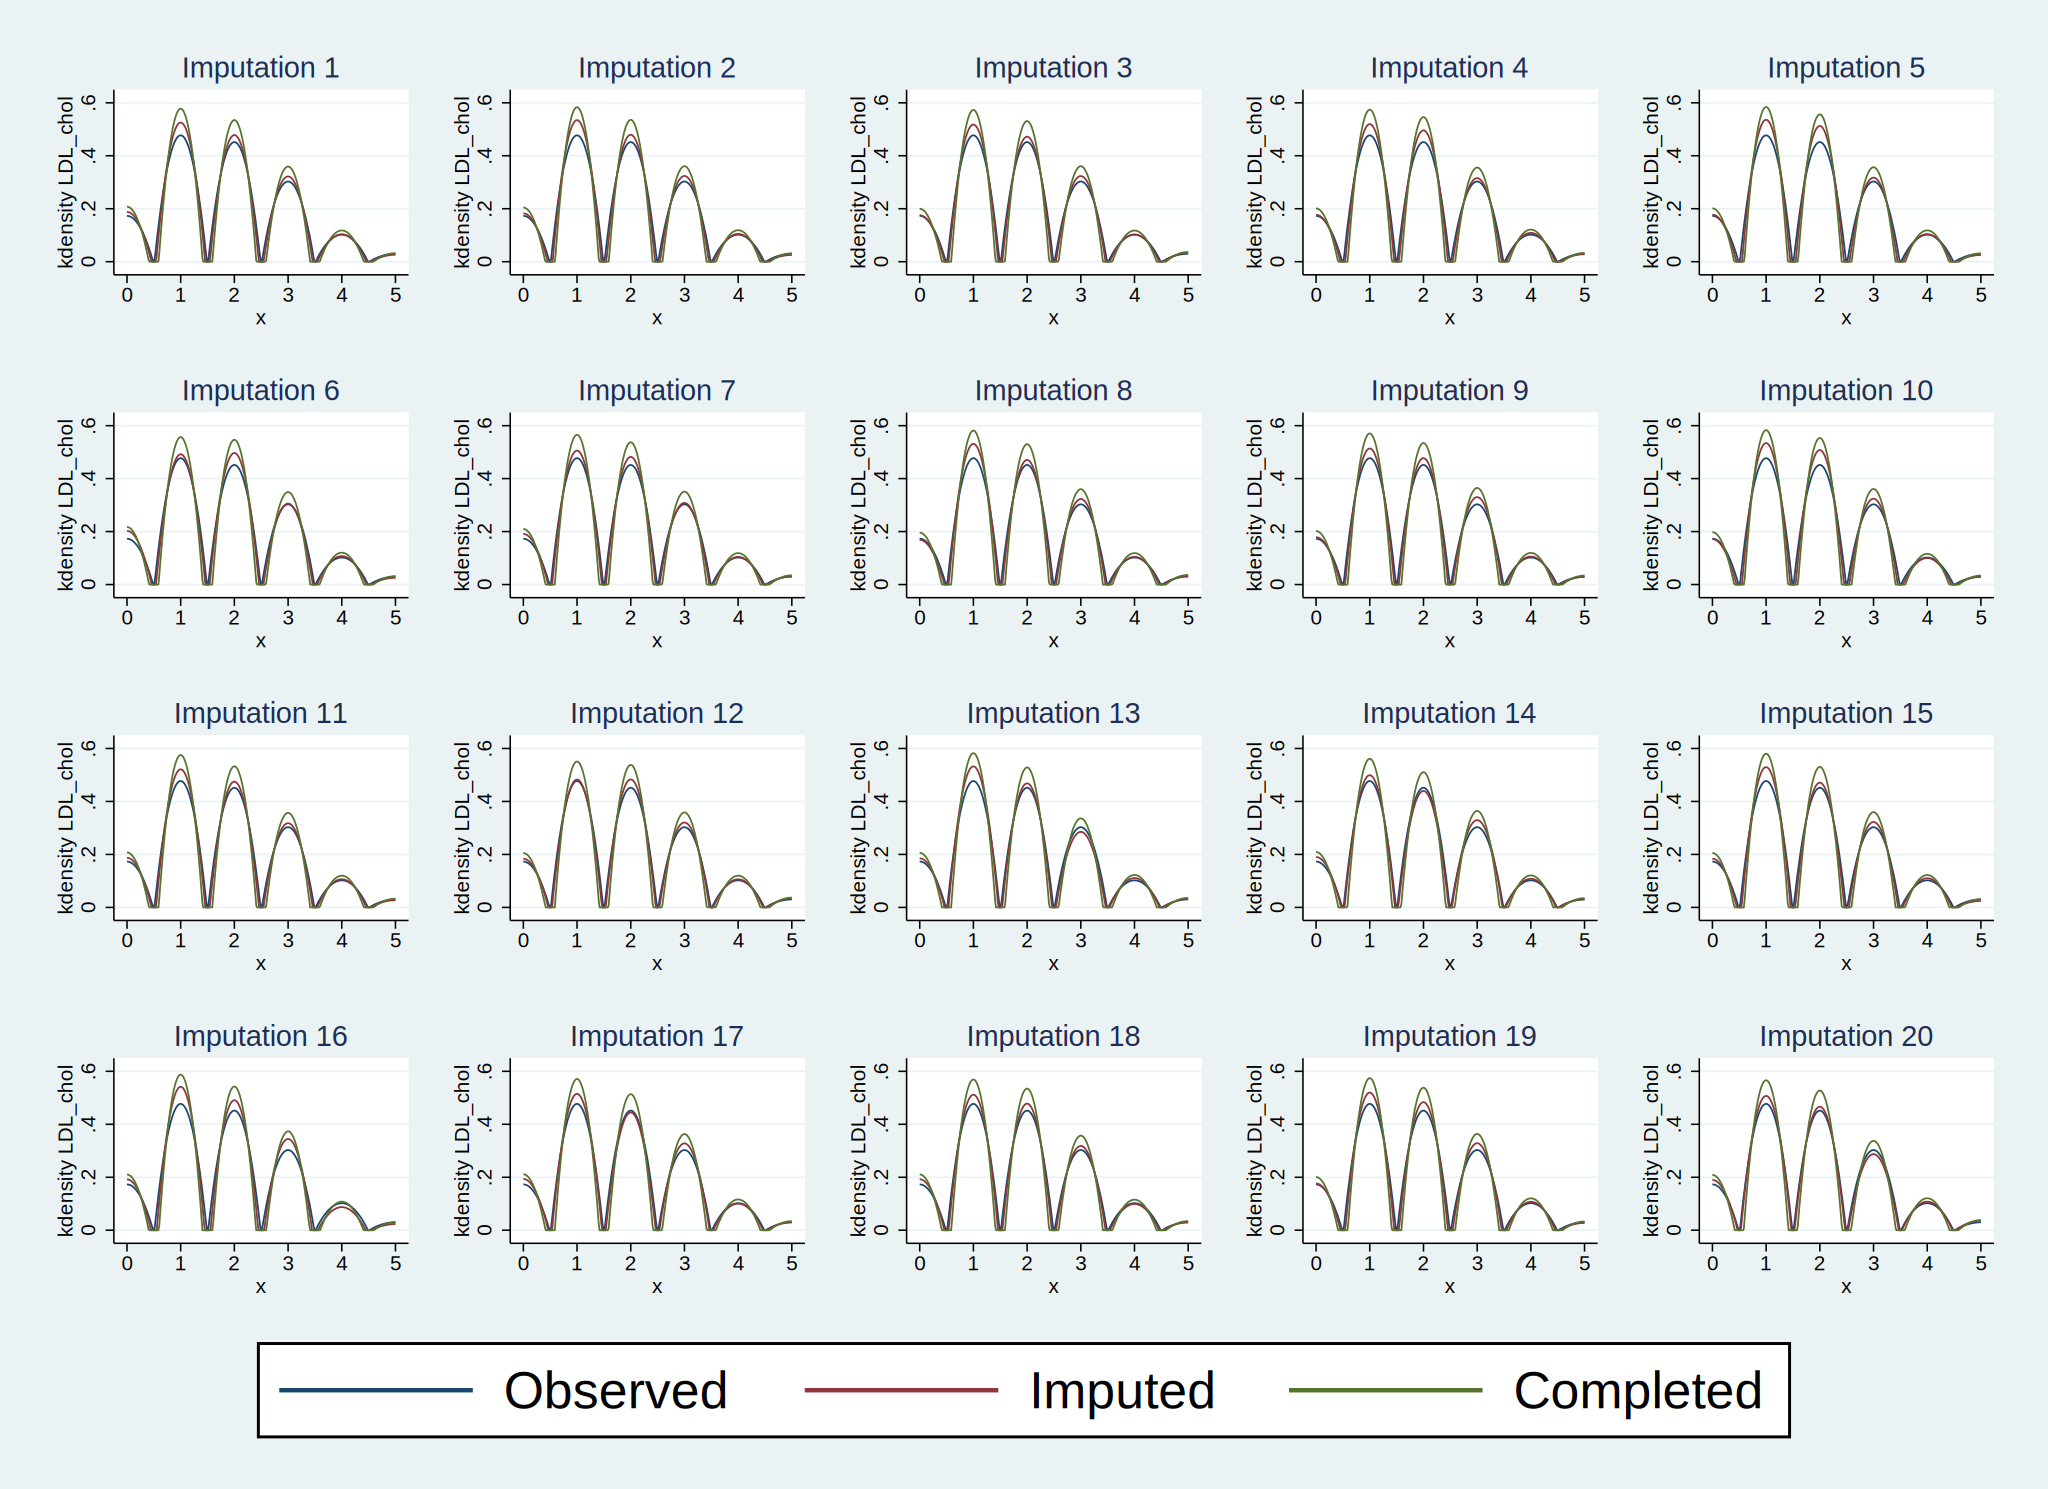

In [25]:
%%stata
midiagplots LDL_chol, combine

<font color="red">**Question: Not sure why there were 5 categorical values in the x-axis ...**</font>

(M = 20 imputations)
(imputed: LDL_chol BMI hypertension Income)
(all imputations assumed with combine)


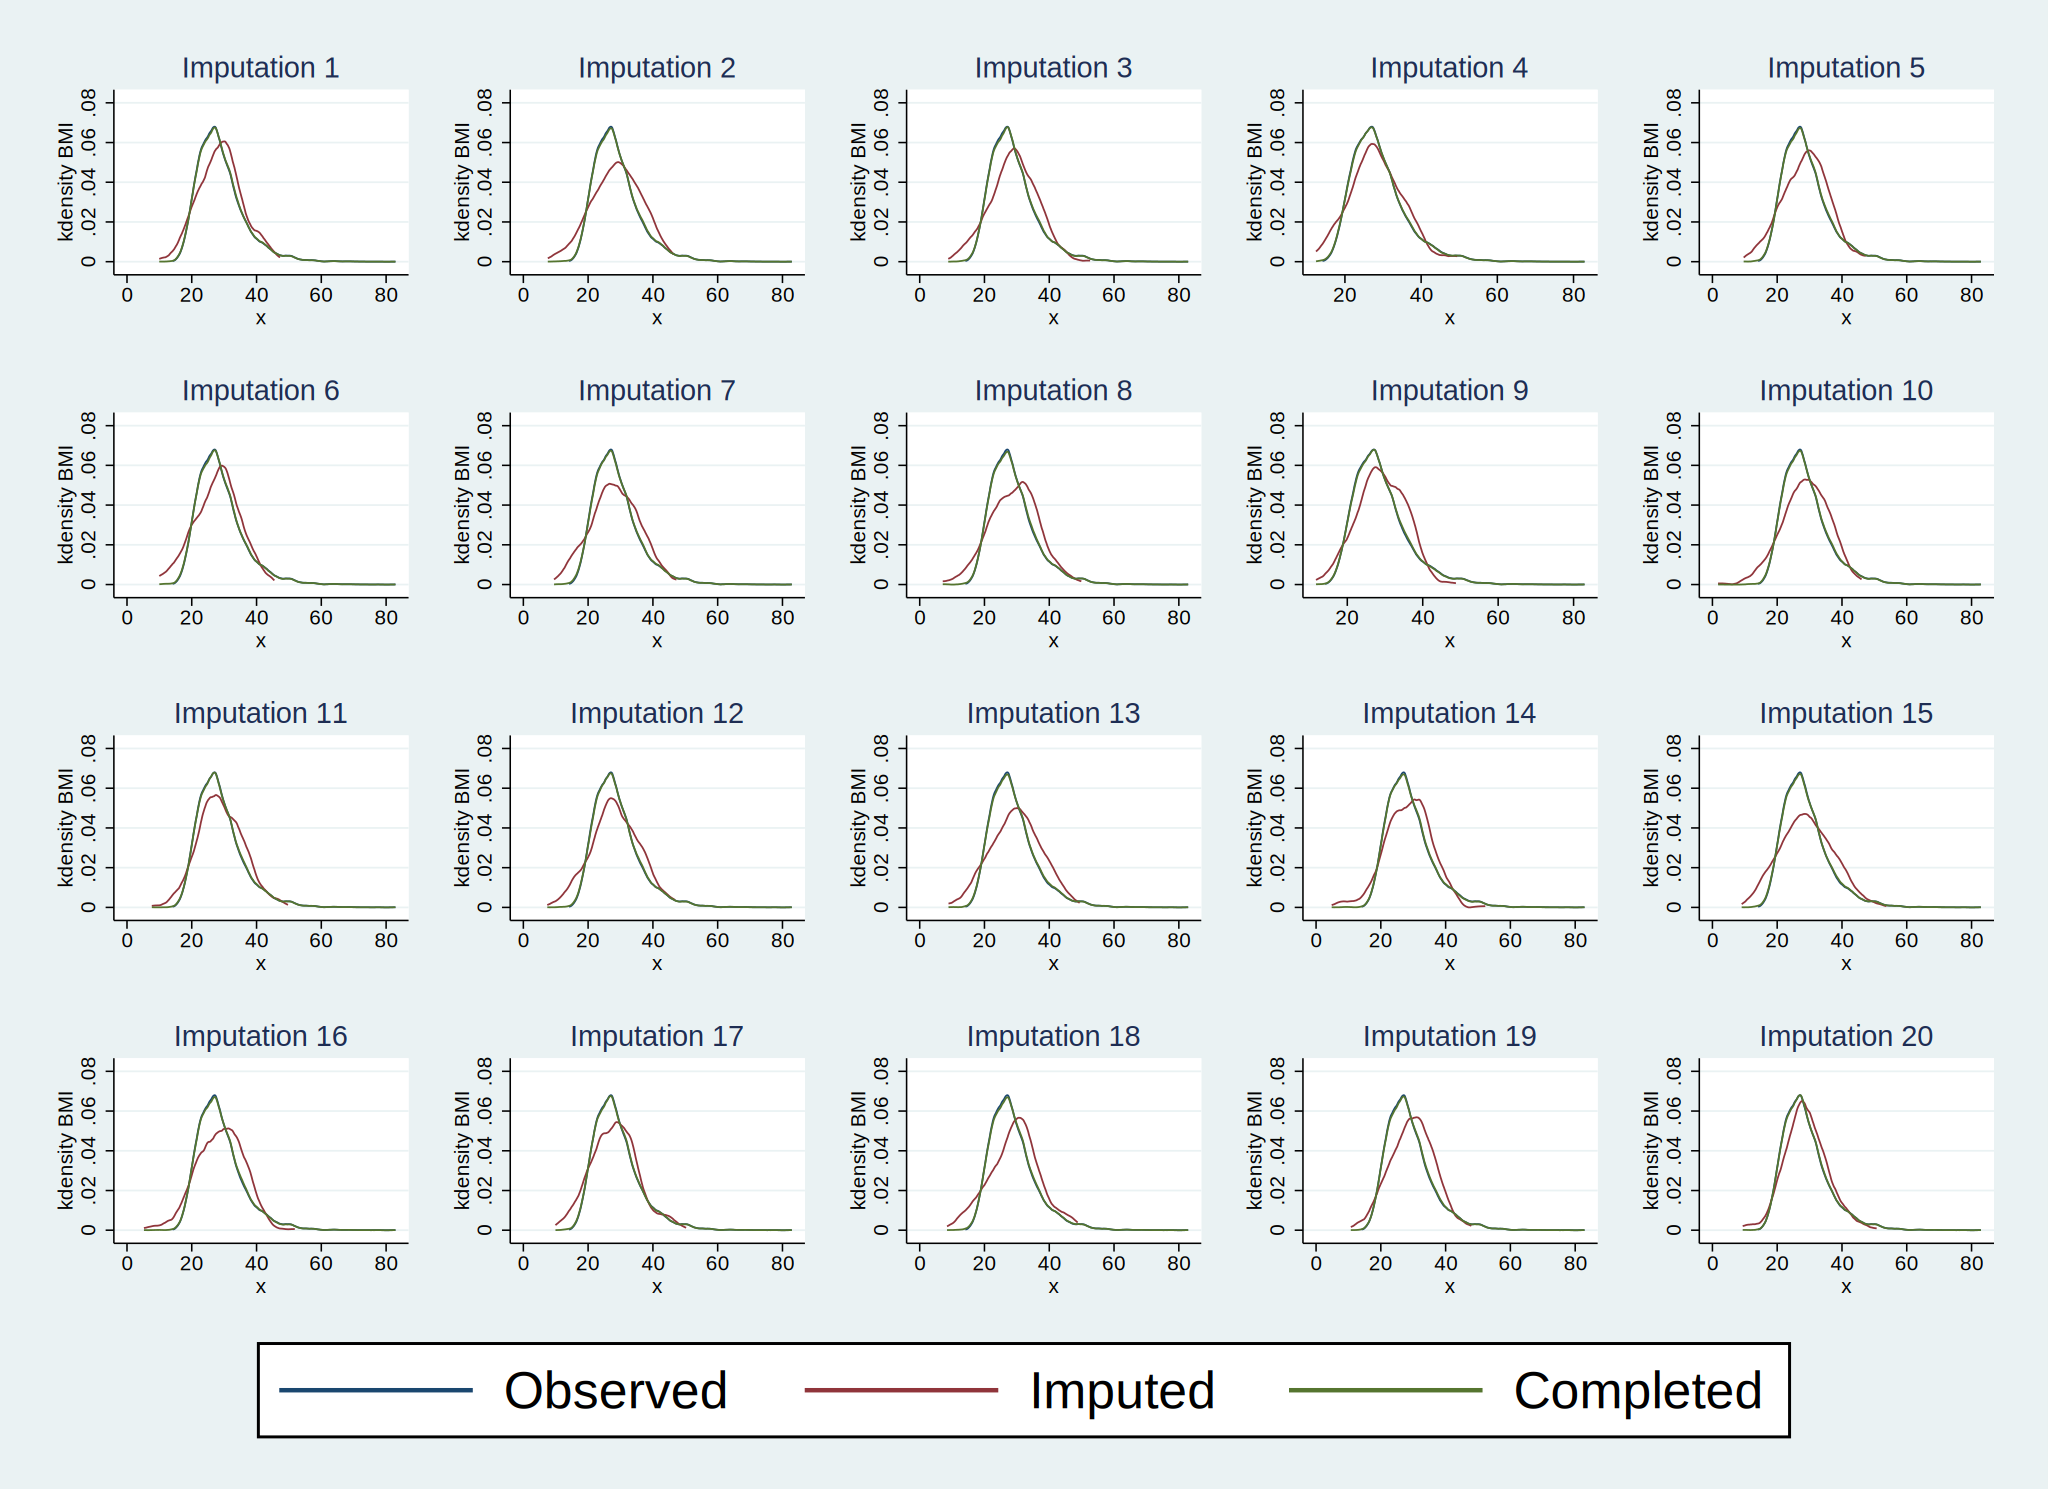

In [26]:
%%stata
midiagplots BMI, combine

(M = 20 imputations)
(imputed: LDL_chol BMI hypertension Income)
(all imputations assumed with combine)


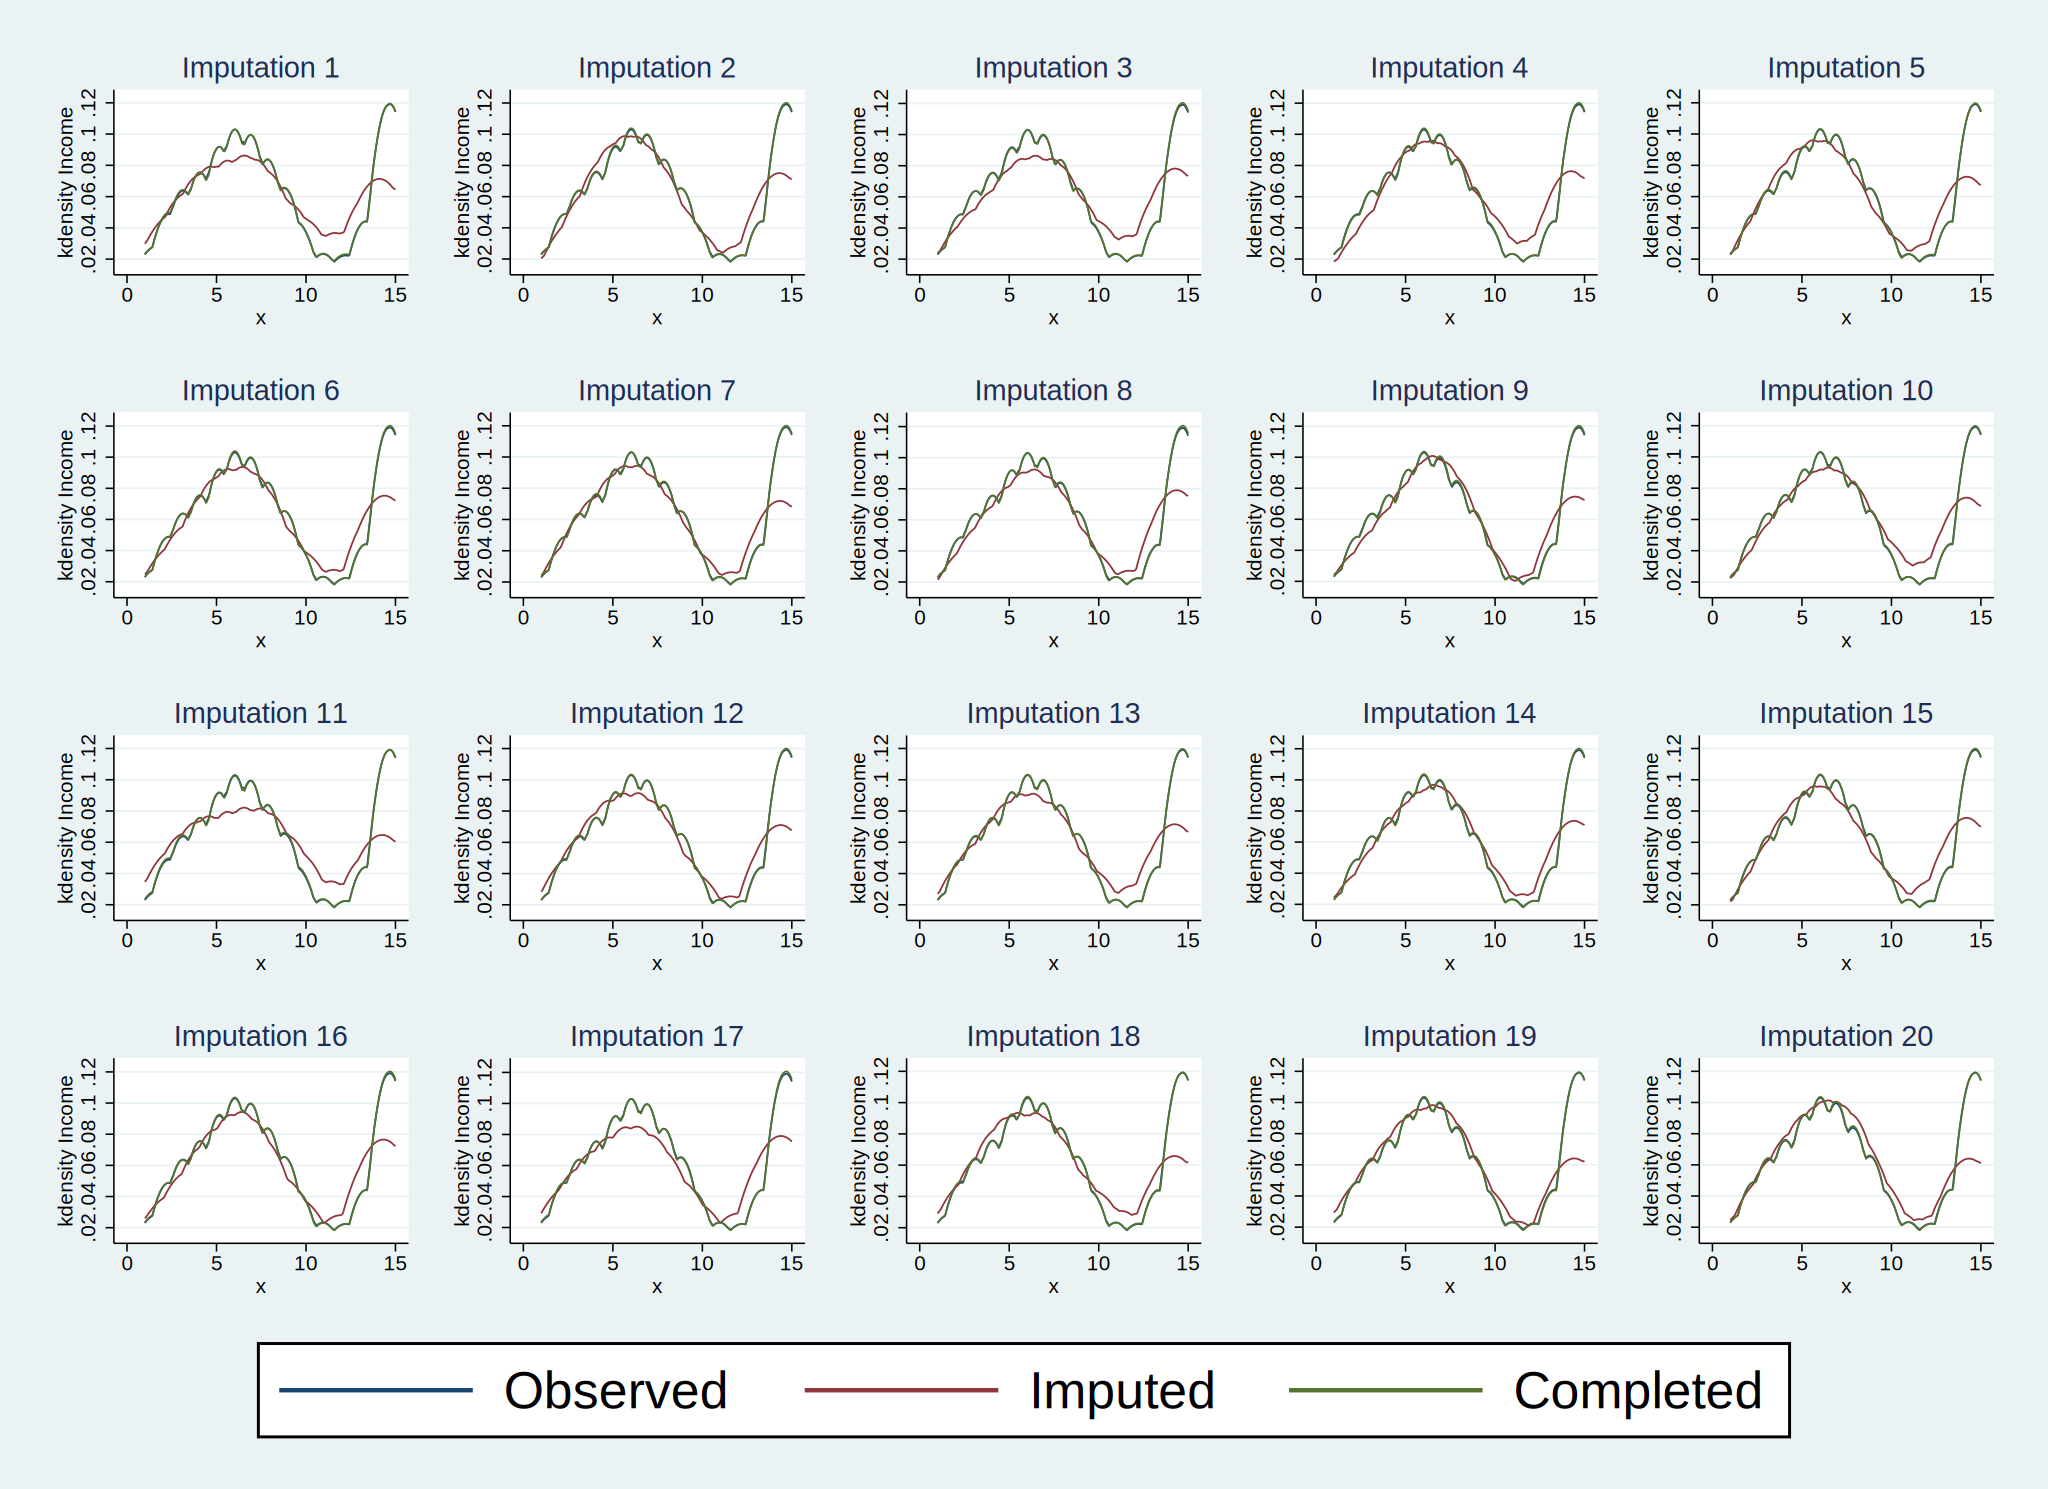

In [27]:
%%stata
midiagplots Income, combine

In [28]:
# Reset graphic size
config.set_graph_size(width=6)

### Phase II & III: Analysis & Pooling Phase

Now that we have generated our imputed data sets we'll conduct the analysis and pooling phase. In the analysis phase we fit our main model to each imputed data set. In our case we wanted to examine the association between the diabetes and different risk factors by using logistic regression, so we have to fit 7 logistic regression models. Then the coefficients of these 7 models will be combined into a final estimate. The analysis and pooling phases are done simultaneously with the use of the `mi estimate` command.

<font color="red">**Question: Am I right to state that we'll fit 7 regression models**</font>

In [29]:
%%stata
mi estimate, dots mcerror: logit diabetes age i.gender i.Ethnicity i.hypertension Income BMI LDL_chol, or


Imputations (20):
  .........10.........20 done

Multiple-imputation estimates                   Imputations       =         20
Logistic regression                             Number of obs     =      6,110
                                                Average RVI       =     0.1083
                                                Largest FMI       =     0.4583
DF adjustment:   Large sample                   DF:     min       =      95.07
                                                        avg       =  18,529.61
                                                        max       =  52,154.78
Model F test:       Equal FMI                   F(  11,18608.3)   =      52.63
Within VCE type:          OIM                   Prob > F          =     0.0000

------------------------------------------------------------------------------
    diabetes | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 

The Monte Carlo error is given directly under the estimates. Determining whether we have minimised it sufficiently is largely subjective but some rules have been suggested in terms of multiple imputation. These are:

    MCE of a coefficient should be ≤ 10% of its standard error.
    MCE of a coefficients T-statistic ≤ 0.1.
    MCE of a coefficients p value ≤ 0.01 if the true p value is 0.05 (traditional 5%).

If the above are not met then we conclude that the variation we observe is unacceptable and that we should increase the number of imputations.

Let’s have a look at `LDL_chol`, our imputed variable. Examining the first condition:

MCE of LDL_chol: .0080391/.055098 ≈ 0.146,

we can see that the first criteria has not been met, suggesting that we may need to increase the number of imputations.

<font color="red">**Question: Could I please confirm that the first rule - MCE of a coefficient should be ≤ 10% of its standard error is calculated as the MCE of the variable (LDL_chol), i.e., .0080391, divided by the Standard Error of the variable, i.e., .055098, and NOT the standard error of the MCE, i.e., .0027268 (which is also listed in the output. Thanks.**</font>

In [30]:
%%stata

//Reload dataset
use "nhanes_MM_exercise", clear
set seed 1001

//Set up the data
mi set mlong

//Specify covariates to be imputed
mi register imputed LDL_chol BMI hypertension Income

//Specify variables that do not require imputation
mi register regular Ethnicity age gender diabetes

//Phase 1: Imputation with respect to diabetes
mi impute chained (pmm , knn(3)) LDL_chol (regress) BMI (pmm , knn(5)) Income (logit) hypertension = diabetes Ethnicity age gender, add(50) rseed(2560)



. 
. //Reload dataset
. use "nhanes_MM_exercise", clear

. set seed 1001

. 
. //Set up the data
. mi set mlong

. 
. //Specify covariates to be imputed
. mi register imputed LDL_chol BMI hypertension Income
(3779 m=0 obs now marked as incomplete)

. 
. //Specify variables that do not require imputation
. mi register regular Ethnicity age gender diabetes

. 
. //Phase 1: Imputation with respect to diabetes
. mi impute chained (pmm , knn(3)) LDL_chol (regress) BMI (pmm , knn(5)) Income
>  (logit) hypertension = diabetes Ethnicity age gender, add(50) rseed(2560)

Conditional models:
               BMI: regress BMI Income i.hypertension LDL_chol diabetes
                     Ethnicity age gender
            Income: pmm Income BMI i.hypertension LDL_chol diabetes Ethnicity
                     age gender , knn(5)
      hypertension: logit hypertension BMI Income LDL_chol diabetes Ethnicity
                     age gender
          LDL_chol: pmm LDL_chol BMI Income i.hypertension diabetes 

In [31]:
%%stata
mi estimate, dots mcerror: logit diabetes age i.gender i.Ethnicity i.hypertension Income BMI LDL_chol, or


Imputations (50):
  .........10.........20.........30.........40.........50 done

Multiple-imputation estimates                   Imputations       =         50
Logistic regression                             Number of obs     =      6,110
                                                Average RVI       =     0.1018
                                                Largest FMI       =     0.4458
DF adjustment:   Large sample                   DF:     min       =     251.48
                                                        avg       =  53,903.94
                                                        max       = 172,628.05
Model F test:       Equal FMI                   F(  11,55337.8)   =      53.07
Within VCE type:          OIM                   Prob > F          =     0.0000

------------------------------------------------------------------------------
    diabetes | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+---------------------------------

To assess the new estimates of MCE, we again compare the MCE vs the Standard Error of the variable:

- **Hypertension**: .0043789/.1089123 = 0.04020574 $\approx$ 4.0%
- **Income**: .0003696/.010743 = 0.0344038 $\approx$ 3.4%
- **BMI**: > .000223/.0060385 = 0.0369297 $\approx$ 3.7%
- **LDL Cholesterol**: .0050961/.0547771 = 0.0930334 $\approx$ 9.3%

All of the results are within the threshold of $\le$ 10% and appears to be suitable for further analysis following Multiple Imputation.

-----